# Recommendation System (Dataset: Online Retail)

Since we're taking two inputs from user, therefore I've included recommendation in two ways:<br>
&emsp; a) First one is normal recommendation in which whole dataset is included to recommend items.<br>
&emsp; b) Second one is recommendation on the basis of monthly data. In this recommendation will be made according to the given month in the user input of &emsp;&emsp;&emsp;date.<br>
<br><br>
Steps Involved:<br>
&emsp;&emsp; 1. Importing libraries and dataset<br>
&emsp;&emsp; 2. Exploratory Data Analysis (EDA)<br>
&emsp;&emsp; 3. Data Visualization<br>
&emsp;&emsp; 4. User Input<br>
&emsp;&emsp; 5. Creating Customer-Item Matrix<br>
&emsp;&emsp; 6. Creating User-to-User Similarity Matrix<br>
&emsp;&emsp; 7. Recommending items

### 1. Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 2. Exploratory Data Analysis (EDA)

In [3]:
df.shape

(541909, 8)

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Handling Null values 

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df = df.dropna(subset=['CustomerID'])

In [11]:
(df[['Quantity', 'UnitPrice', 'CustomerID']] > 0).all()

Quantity      False
UnitPrice     False
CustomerID     True
dtype: bool

In [12]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [14]:
(df[['Quantity', 'UnitPrice', 'CustomerID']] > 0).all()

Quantity      True
UnitPrice     True
CustomerID    True
dtype: bool

In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Feature Engineering 

In [16]:
# creating a new column from 'InvoiceDate' containing the information only about month
date_list = []
for i in df['InvoiceDate']:
    a = int(str(i)[5:7])
    date_list.append(a)
df["in_month"] = date_list # adding it to dataframe

### 3. Data Visualization 

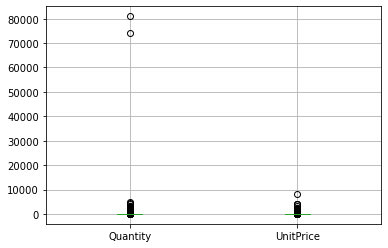

In [17]:
# boxplot
df[['Quantity', 'UnitPrice']].boxplot()

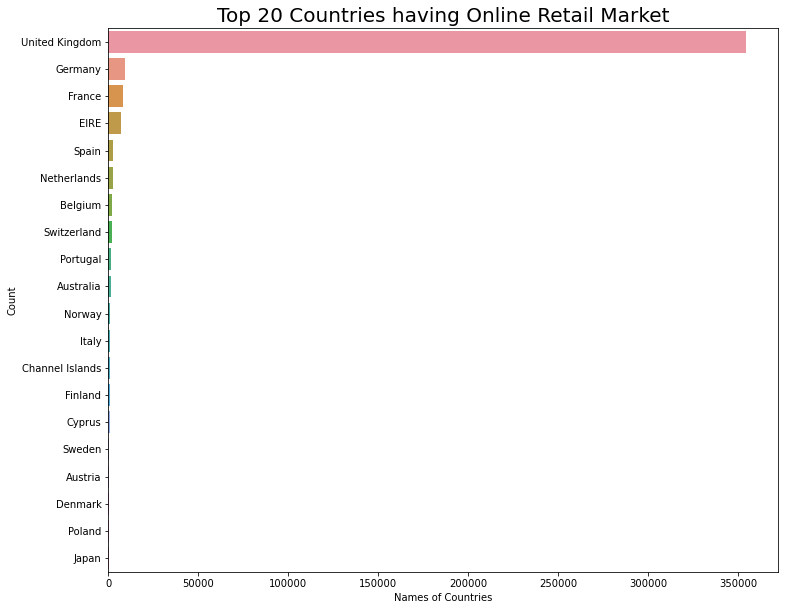

In [18]:
# checking the different values for country in the dataset

plt.rcParams['figure.figsize'] = (12, 10)
a = df['Country'].value_counts().head(20)
sns.barplot(x = a.values, y = a.index)
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

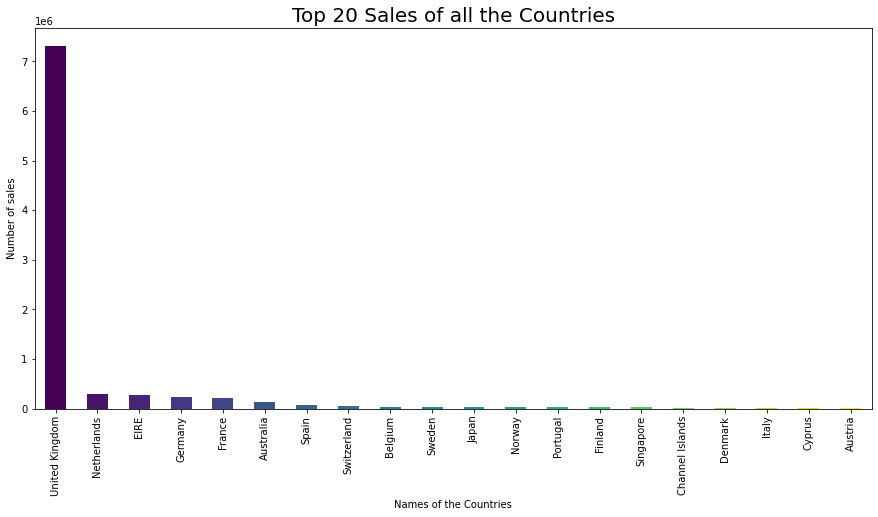

In [19]:
# looking at each country's sales

color = plt.cm.viridis(np.linspace(0, 1, 20))
df['Sales'] = df['UnitPrice'] * df['Quantity']
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7),color = color)
plt.title('Top 20 Sales of all the Countries', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of sales')
plt.show()

In [20]:
# checking how many unique customer IDs and different number of unique countriesare there

unique_ids = df['CustomerID'].drop_duplicates().tolist()
unique_contries = df['Country'].drop_duplicates().tolist()

# printing the value
print("There are {} number of different customers".format(len(unique_ids)))
print("There are {} number of different countries".format(len(unique_contries)))

There are 4338 number of different customers
There are 37 number of different countries


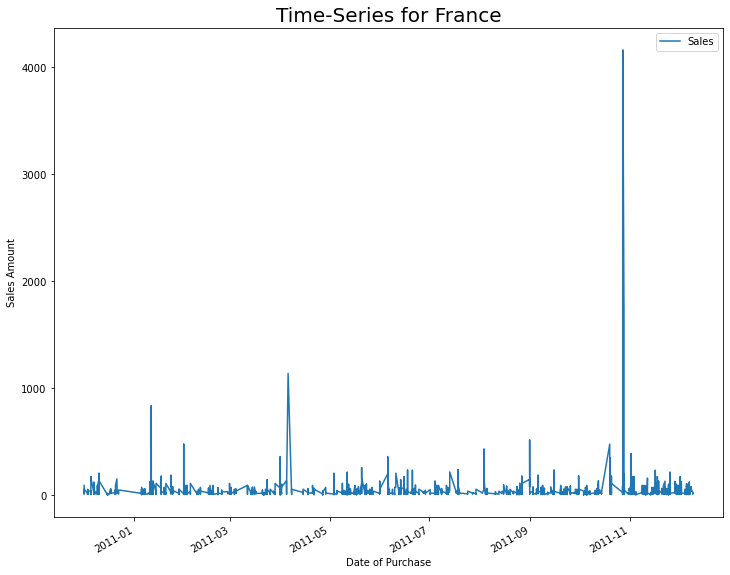

In [21]:
# time-series plot for France

dataset = df[df['Country'] == 'France']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for France', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

### 4. User Input 

In [23]:
user_id = float(input('Please enter your customer id: ')) # user input for customer id

# if given id does not match with existing user ids
if user_id not in unique_ids:
    print('No user with this customer id. Please check with given ids and try again!')
    for i in unique_ids:
        print(i)
    sys.exit()

print('Please enter date') # saperate user input for date, month and year
u_day = int(input('Day: '))
u_month = int(input('Month: '))
u_year = int(input('Year: '))

# date should lie in perticular range
if u_day not in range(1, 32):
    print('Invalid Date')
    sys.exit()
if u_month not in range(1, 13):
    print('Invalid Date')
    sys.exit()
if u_year not in range(1000, 5000):
    print('Invalid Date')
    sys.exit()


# choice to decide if you want recommendation with or without date
choice = int(input('Do you want recommendations for this month or for whole year (press 0 for year/press 1 for month)'))
if choice == 0:
    data = df       
elif choice == 1:
    data = df[df['in_month'] == u_month]
    if user_id not in data['CustomerID'].drop_duplicates().tolist(): # if no similar user is found in perticular month
        print('No recommendations for you in this month.')
        sys.exit()
else:
    print('Invalid Choice')

Please enter your customer id: 12358
Please enter date
Day: 12
Month: 12
Year: 2020
Do you want recommendations for this month or for whole year (press 0 for year/press 1 for month)0


### 5. Creating Customer-Item Matrix

In [24]:
#Pivot Table

# Creating a pivot table that contains the customer IDs as the index, and each invidividual item as a column
customer_item_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity')

# changing NaN calues to zero and values above 0 as 1
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0) 
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Creating User-to-User Similarity Matrix

In [25]:
# User-to-User Similarity Matrix

# creating User-to-User Similarity Matrix by measuring the cosine of angle between two users
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))

# changing the column headers and index to the CustomerIds
user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000


### 7. Recommending items 

In [26]:
#items to recommend to a customer using customer similarity

# Sort on the basis of customers which are most similar
most_similar_user = user_user_sim_matrix.loc[user_id].sort_values(ascending=False).reset_index().iloc[1, 0] 

# Items purchased by given customer
items_bought_by_user1 = set(customer_item_matrix.loc[user_id].iloc[customer_item_matrix.loc[user_id].to_numpy().nonzero()].index)

# Items purchased by similar customer
items_bought_by_user2 = set(customer_item_matrix.loc[most_similar_user].iloc[customer_item_matrix.loc[most_similar_user].to_numpy().nonzero()].index)

# Items to recommend to given customer
items_to_recommend_to_1 = items_bought_by_user2 - items_bought_by_user1

# discription of these items
items_description = data.loc[data['StockCode'].isin(items_to_recommend_to_1), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
print('The following items are recommended for given user:')
items_description

The following items are recommended for given user:


,Description
StockCode,
85014B,RED RETROSPOT UMBRELLA
15044D,RED PAPER PARASOL
